# Rating Case Study
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data 

In [26]:
df_1=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Ratings Project/data3.csv")
df_2=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Ratings Project/data2.csv")
df_3=pd.read_csv("/Users/bhupendrakumar/Documents/Personal/Internship/Ratings Project/data.csv")

In [28]:
df=pd.concat([df_1,df_2],ignore_index=True)

In [32]:
df.dtypes

Unnamed: 0      int64
Rating         object
Full Review    object
dtype: object

In [31]:
df_3.dtypes

Unnamed: 0      int64
Rating          int64
Full Review    object
dtype: object

In [33]:
df.head()

,Unnamed: 0,Rating,Full Review
0,0,1.0 out of 5 stars,\n\n\n Your browser does not support HTML5 vi...
1,1,1.0 out of 5 stars,\n\n The printer in itself is good however HP...
2,2,5.0 out of 5 stars,\n\n I was looking for a moderately priced in...
3,3,1.0 out of 5 stars,\n\n I bought this one for my home office. Th...
4,4,3.0 out of 5 stars,"\n\n In the product description, it can take ..."


In [37]:
df['Rating']=df['Rating'].str.replace(" out of 5 stars","")
df['Full Review']=df['Full Review'].str.replace("\n","")

In [47]:
#Convert data type of rating to integer
df['Rating']=pd.to_numeric(df['Rating'], downcast='integer')

In [48]:
df.dtypes

Unnamed: 0      int64
Rating           int8
Full Review    object
dtype: object

In [49]:
#Concatenating all the data files collected in several iteration
Final_df=pd.concat([df,df_3],ignore_index=True)

In [51]:
Final_df.dtypes

Unnamed: 0      int64
Rating          int64
Full Review    object
dtype: object

In [52]:
# Remove Unnamed column, as it is irrelevant for us
Final_df.drop('Unnamed: 0',inplace=True,axis=1)

In [115]:
Final_df=Final_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [116]:
Final_df.shape

(16081, 2)

In [117]:
Final_df

,Rating,Full Review
0,1,your browser does not support html video just ...
1,1,the printer itself good however not repairing ...
2,5,was looking for moderately priced inktank prin...
3,1,bought this one for home office the first impr...
4,3,the product description can take upto pages bl...
...,...,...
21167,4,excellent product for beginners
21170,5,not good clrarity
21173,4,very nice and very good
21174,4,vgood


In [55]:
#Output variable is Rating
Final_df['Rating'].value_counts()

5    11454
4     4923
3     2186
1     1988
2      630
Name: Rating, dtype: int64

In [56]:
# Importing libraries wordcloud and collections libraries
from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline


In [69]:
def fnWordCloud(token,rating):
    #Input to the function is feature name
    """
    Visualizing the most common words for 5 ratings.
    """
    threat_context = Final_df[Final_df[token] == rating]
    threat_text = threat_context['Full Review']
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:Rating


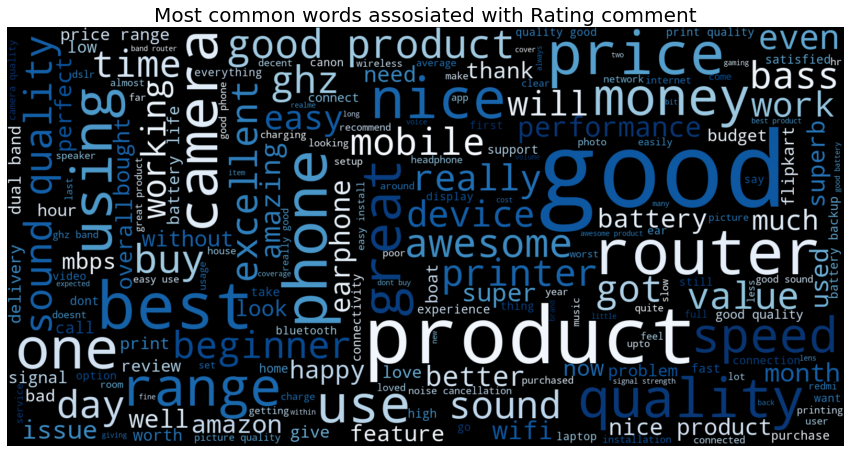

In [118]:
#Input is rating 5
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token,5)

Choose a class to visualize the most common words contributing to the class:Rating


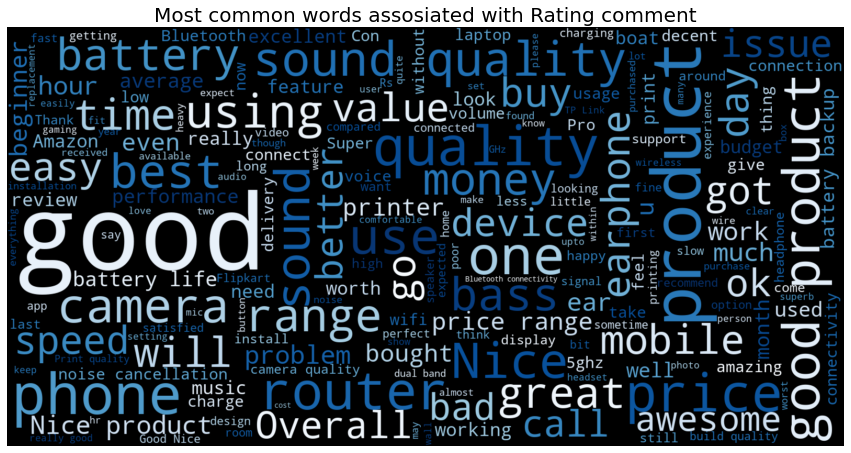

In [71]:
#Input is rating 4
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token,4)

Choose a class to visualize the most common words contributing to the class:Rating


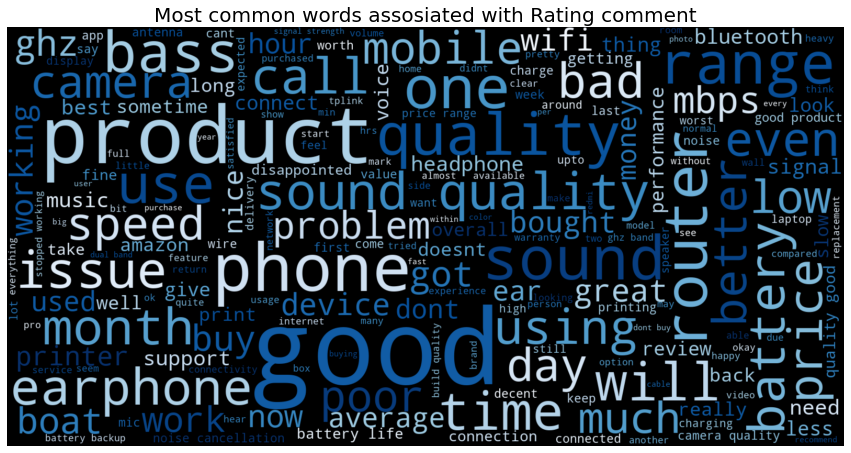

In [119]:
#Input is rating 3
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token,3)

Choose a class to visualize the most common words contributing to the class:Rating


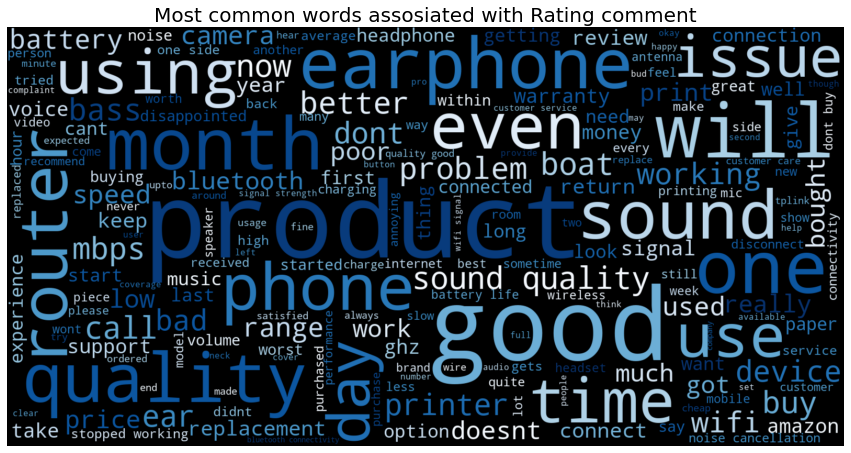

In [121]:
#Input is rating 2
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token,2)

Choose a class to visualize the most common words contributing to the class:Rating


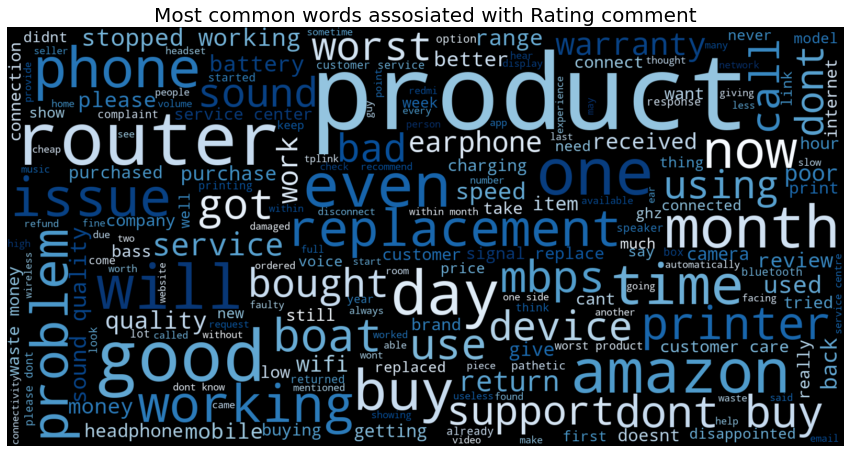

In [120]:
#Input is rating 1
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
fnWordCloud(token,1)

## Feature Engineering

In [76]:
Final_df['Full Review']=Final_df['Full Review'].str.lower()

In [77]:
# Replace email address by NULL string
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"")

#Replace URLs with NULL string
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',"")

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

#Replace numbers with NULL string
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'\d+(\.\d+)?', "")

# Replace punctuation
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'[^\w\d\s]', '')

#Replace spaces by single space
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'\s+', ' ')

# Replace remove trailing and leading whitespaces
Final_df['Full Review'] = Final_df['Full Review'].str.replace(r'^\s+|\s+?$', '')

In [79]:
# Importing NLTK library and stopwords corpus
from nltk.corpus import stopwords
import nltk
import string

In [131]:
# Removing words with length <=2, since research shows that they doesn't carry significant meaning.
for iIter in range(Final_df.shape[0]):
    Final_df['Full Review'][iIter]=" ".join([sWord for sWord in nltk.word_tokenize(Final_df['Full Review'][iIter]) if len(sWord)>2])

KeyError: 660

In [82]:
# Remove stopwords. 
stop_words = set(stopwords.words('english') )

#Removing stopwords from text
Final_df['Full Review'] = Final_df['Full Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

AttributeError: 'float' object has no attribute 'split'

In [98]:
Final_df= Final_df.dropna()

In [106]:
print(Final_df['Full Review'][10020])

KeyError: 10020

In [102]:
Final_df.isnull().sum()

Rating         0
Full Review    0
dtype: int64

In [90]:
print(set(stop_words))

{'yourselves', "wouldn't", 'be', 'will', 'shouldn', 'him', 'shan', 'were', 'ourselves', 'again', 'so', "mustn't", 'their', 'am', 've', 'he', 'it', "you're", "won't", 'couldn', 'in', 'being', 'because', 't', 'before', 'we', 'most', "you'd", 'those', 'why', 'below', 'further', 'mightn', 'no', 'theirs', 'her', 'should', 'mustn', 'do', 'had', 'ain', 'over', 'themselves', 'needn', 'she', "doesn't", 'if', "shouldn't", 'for', 'is', 'such', 'has', 'more', 'i', "she's", 'other', 'each', 'haven', 'through', 'aren', 'both', 'doesn', 'was', 'a', 'isn', 'y', "weren't", 'ours', 'that', "couldn't", 'herself', 'own', 'hadn', 'you', 'don', 'of', 'only', 's', 'these', "didn't", "should've", 'all', 'they', "aren't", 'been', 'above', "that'll", 'from', "you'll", "don't", 'can', 'whom', 'does', 'weren', 'down', 'how', 'll', "it's", 'and', 'into', "hadn't", 'himself', 'm', 'our', 'too', 'his', 'nor', 'any', "you've", 'your', 'but', "mightn't", 'd', 'about', 'between', 'then', 'o', 'its', 'this', 'here', 'it

In [92]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
# Creating classifiers with default parameters initially.
clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = LinearSVC()

In [132]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                        stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
X = vector.fit_transform(Final_df['Full Review'])
Y=Final_df['Rating']

In [133]:
# Finding the best fit ML algo's and tuning random state.
MLAlgos_list=[LogisticRegression(),LinearSVC(),MultinomialNB(),RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]
for algo in MLAlgos_list:
    max_acc=0
    active_acc=0
    iBest_rs=0
    model=algo
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        active_acc=accuracy_score(pred,y_test)
        if active_acc>max_acc:
            max_acc=active_acc
            iBest_rs=iActive_rs
    print("Best accuracy for {} algo is {} at random state {}.".format(algo,max_acc,iBest_rs))
#Observation:
#MultinomialNB is giving us the best fit model.

Best accuracy for LogisticRegression() algo is 0.5744482437053156 at random state 77.
Best accuracy for LinearSVC() algo is 0.550512900217594 at random state 62.
Best accuracy for MultinomialNB() algo is 0.570407211687908 at random state 77.
Best accuracy for RandomForestClassifier() algo is 0.5585949642524091 at random state 77.
Best accuracy for GradientBoostingClassifier() algo is 0.5604600559527511 at random state 77.
Best accuracy for AdaBoostClassifier() algo is 0.551445446067765 at random state 77.


In [136]:
# Hypertuning the parameters of MultinomialNB using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[1.0, 0],'fit_prior':[True,False]}
MNB=MultinomialNB()
MNB_BestFit=GridSearchCV(MNB,parameters)
MNB_BestFit.fit(X,Y)
print(MNB_BestFit.best_params_)

{'alpha': 1.0, 'fit_prior': True}


In [137]:
# As observed above, MultonomialNB is performing best with default parameters.

X_train,x_test,Y_train,y_test = train_test_split(X,Y,random_state=77)

Best_fit_Alg=MultinomialNB()

Best_fit_Alg.fit(X_train,Y_train)

y_pred= Best_fit_Alg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.5665257398657051


In [138]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(Best_fit_Alg,'Rating_classifier.pkl')

['Rating_classifier.pkl']

In [140]:
Final_df.to_csv('/Users/bhupendrakumar/Documents/Personal/Internship/Ratings Project/Final_data.csv')